# Statistiek 101

Voorbeeldoplossingen van de opdrachten uit Jupyter notebook "Statistiek-101".

---

In [1]:
# print library versions
import platform, sys
import numpy as np
import scipy as sp

print(f"Python: {platform.platform()}, version:{sys.version[0:6]}")
print(f"numpy version: {np.__version__}")
print(f"scipy version: {sp.__version__}")


Python: Windows-10-10.0.26100-SP0, version:3.11.9
numpy version: 2.3.4
scipy version: 1.16.3


### Numerieke data (*numerical*)

- kwantitative gegevens
- discrete gegevens:
> - gehele getallen, zoals bijvoorbeeld: hoeveel bestellingen heeft een klant gedaan in een jaar?
- continue gegevens:
> - hoeveel tijd koste het een klant om een product te kopen?
> - hoeveel regen valt er op een dag?

![](images/temperature.png)

### Categorische data (*categorical*)

- kwalitatieve gegevens die geen (inherente) wiskundige betekenis hebben:
> - geslacht (M/V/X..), 
> - yes/no (binaire data), 
> - product categorie, 
> - politieke partij,  
> - provincie waarin je woont 
- je kunt nummers aan categorieën toewijzen om ze, bijvoorbeeld, compacter weer te geven, maar de getallen hebben geen wiskundige betekenis

![](images/ned_prov.png)

### Rang/schaal data (*ordinal*)

- mix van numerieke en categorische gegevens.
- categorische data dat wel een (wiskundige)betekenis heeft:
> - beoordelingen (*ratings*), bijvoorbeeld film beoordelingen in de vorm van aantal sterren
> - beoordelingen zijn 1, 2, 3, 4 of 5. Elk van deze getallen heeft wel een betekenis: 2 betekent dat het een betere film is dan een 1, etc.

![](images/stars.png)

### Quiz/oefening

Zijn de volgende soorten gegevens *numerical*, *categorical* of *ordinal*? (6 examples)

#### 1. De hoeveelheid benzine in de benzinetank van jouw auto.

numeriek, continous data (elk getal ook al zit er een maximum aan).

#### 2. Inschatten van jouw algehele gezondheid op een schaal van 1 tot 4, waarbij 1 is slecht, 2 is matig, 3 is goed en 4 is uitstekend.

ordinal

#### 3. De nationaliteiten van alle afstudeerders.

categorical (je kan ze niet met elkaar vergelijken in de wiskundige betekenis)

#### 4. De leeftijden van je klasgenoten.

numerical, continuous data

#### 5. Het geld dat je uitgegeven hebt in een winkel.

numerical, continuous data

#### 6. Het aantal studenten in deze klas.

numeric, discrete data, je kan immers geen 'halve' of 'kwart' student hebben.

#### Interessante discussie op StackOverFlow:
__[What is the difference between discrete data and continuous data?](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)__

---
## Oefening Mean vs. Median

In [3]:
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
incomes[0:10]  # print first 10 array-elements

array([43081.8362361 , 19824.73584997, -5280.49942096, 32318.33170614,
       41381.23062341,  5445.79928286, 18225.10078351, 44687.33945947,
       20214.71990452, 29159.3601223 ])

#### Bereken het gemiddelde en de mediaan van het inkomen `incomes`.

In [4]:
print(f"Gemiddelde inkomen : {np.mean(incomes)}")
print(f"Mediaan van inkomen: {np.median(incomes)}")

Gemiddelde inkomen : 27093.55798764399
Mediaan van inkomen: 26979.872306366437


#### Voegtoe het inkomen aan de `incomes` array.

In [6]:
incomes = np.append(incomes, [1000000000])

#### Bereken wederom het gemiddelde en de mediaan van het inkomen `incomes` (met de uitschieter).

**Opmerking**: 
median noemt men ook wel een "typisch voorbeeld" van de data-verzameling, en dat is niet altijd het geval met het gemiddelde!

In [7]:
print(f"Gemiddelde inkomen : {np.mean(incomes)}")
print(f"Mediaan van inkomen: {np.median(incomes)}")

Gemiddelde inkomen : 227048.14835797242
Mediaan van inkomen: 26984.693511660917


---
## Oefening Mode

#### Bereken de mode van de leeftijden `ages`. 
Maak gebruik van de class `stats` uit library `scipy`.

In [8]:
ages = np.random.randint(18, high=90, size=500)
ages

array([74, 29, 55, 20, 89, 80, 73, 25, 53, 75, 82, 39, 45, 83, 48, 69, 60,
       59, 22, 67, 79, 34, 24, 82, 34, 35, 42, 76, 61, 34, 45, 85, 55, 54,
       83, 41, 63, 58, 55, 20, 52, 77, 47, 72, 50, 71, 27, 62, 60, 55, 18,
       32, 33, 81, 35, 56, 78, 58, 60, 80, 44, 59, 69, 44, 51, 26, 61, 54,
       80, 22, 44, 33, 63, 79, 84, 74, 79, 46, 32, 74, 49, 44, 46, 72, 28,
       51, 33, 30, 27, 41, 32, 57, 40, 63, 20, 58, 78, 70, 81, 27, 85, 68,
       18, 59, 29, 79, 80, 36, 70, 67, 68, 36, 66, 44, 64, 51, 89, 86, 59,
       55, 43, 18, 59, 81, 46, 63, 57, 76, 26, 58, 82, 83, 84, 32, 50, 22,
       50, 78, 30, 67, 74, 66, 41, 23, 65, 43, 29, 25, 84, 88, 74, 41, 65,
       47, 28, 82, 47, 37, 55, 80, 45, 19, 59, 53, 68, 39, 80, 81, 59, 67,
       22, 57, 74, 39, 22, 51, 83, 78, 52, 80, 43, 49, 74, 57, 86, 37, 22,
       57, 80, 24, 32, 71, 38, 26, 68, 19, 71, 26, 37, 25, 36, 45, 49, 83,
       44, 48, 39, 56, 65, 51, 39, 56, 30, 79, 42, 78, 48, 41, 18, 83, 44,
       44, 65, 51, 70, 77

In [9]:
from scipy import stats
#stats.mode(ages)  # gives Future-Warning
stats.mode(ages, keepdims=False)


# Uitleg ModeResult: 
#  number `n` is most common value,
# which occurs `count` times.

ModeResult(mode=np.int32(80), count=np.int64(14))

---
## Oefening e-commerce data

Bepaal nu het gemiddelde en de mediaan van deze gegevens. Schrijf in het onderstaande codeblok je code en kijk of je resultaat klopt:

In [10]:
# vul hier jouw code in


Probeer met de bovenstaande code te spelen zoals toevoegen uitschieters (*outliers*) om hun effect te zien. Maak zowel grote als kleine uitschieters.

---
## 3. Standaard deviatie en variantie


---
### Oefening inkomens dataset

#### Bepaal de standaard deviatie en variance van de inkomens arrary `incomes`.

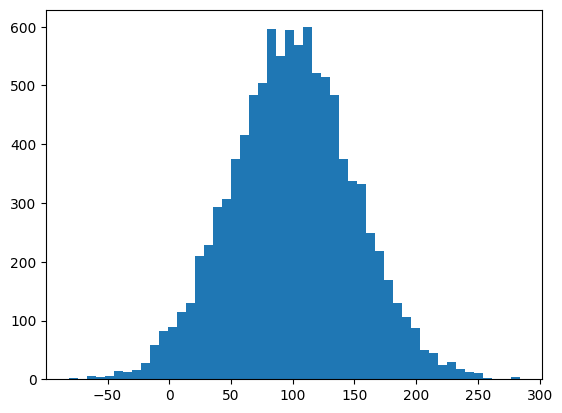

Std deviatie: 50.06796081701159
Variance: 2506.8007003738076


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(100.0, 50.0, 10000)

plt.hist(incomes, 50)
plt.show()

# standaarddeviatie
print(f"Std deviatie: {incomes.std()}")

# variance
print(f"Variance: {incomes.var()}")

## Oefening voorbeelddataset


standard deviation: 2.244994432064365


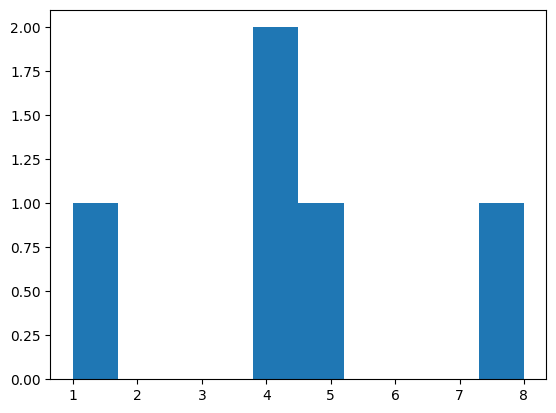

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dataset = np.array([1,4,5,4,8])

# histogram, standaarddeviatie & variance
# voorbeeld oplossing
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dataset = np.array([1,4,5,4,8])
plt.hist(dataset)
plt.plot()

stddev = dataset.std()
print('standard deviation: {}'.format(stddev))